### This is the base model notebook

## take aways

predicting the cost of insurance charges using regressor. the highest 

In [33]:
from sklearn.ensemble import RandomForestRegressor

kaggle_location = "mosapabdelghany/medical-insurance-cost-dataset"
kaggle_filepath = "insurance.csv"
training_colum = "charges"
columns_to_drop = []
selected_model = RandomForestRegressor

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score
import kaggle as kag
from kagglehub import KaggleDatasetAdapter
import kagglehub
from pprint import pprint

In [35]:
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  kaggle_location,
  kaggle_filepath,
)

/tmp/ipykernel_68088/928910658.py:1: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


In [36]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [44]:
columns_to_drop.append(training_colum)
X = df.drop(columns=columns_to_drop)
y = df[training_colum]

In [45]:
OE = OrdinalEncoder()
X_encoded = OE.fit_transform(X, y)

In [46]:
LE = LabelEncoder()
y_encoded = LE.fit_transform(y)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.25, train_size=0.75, shuffle=True)

In [48]:
model = selected_model()
model.fit(X=X_train, y=y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [49]:
y_pred = model.predict(X_test)

In [50]:
mse = mean_absolute_error(y_test, y_pred)
print(f"MSE : {mse}\n")

MSE : 94.91160696517413



<Axes: >

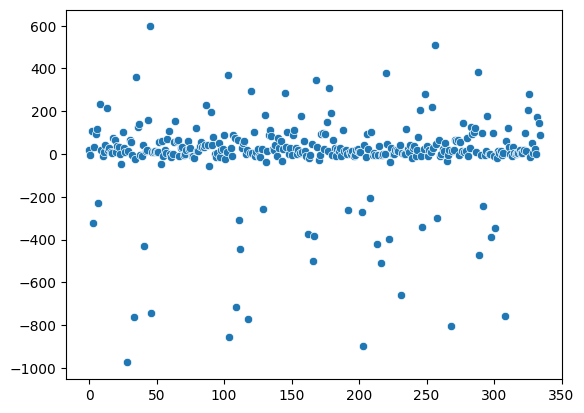

In [51]:
residuals = y_pred - y_test
sns.scatterplot(residuals)

In [52]:
for col, val in zip(df.columns, model.feature_importances_):
    print(col, val)

age 0.3802456630223682
sex 0.008501489585599075
bmi 0.08567675402469997
children 0.035956699649468356
smoker 0.4699730003212916
region 0.019646393396572606
